In [1]:
import sys; sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/AnalysisTreesInformation/AnaTreesPackage/notebooks/')
from notebooks_tools import * 
import ROOT , rootpy
from root_numpy import hist2array
from matplotlib.ticker import NullFormatter
%matplotlib inline

/usr/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [15]:
U_mb = np.concatenate([np.arange(0,1728,48),np.arange(1728,2400,96)])
U_mb_last = np.concatenate([np.arange(0+47,1728+47,48),np.arange(1728+95,2400+95,96)])

V_mb = np.concatenate([np.arange(2400,3072,96),np.arange(3072,4800,48)])
V_mb_last = np.concatenate([np.arange(2400+95,3072+95,96),np.arange(3072+47,4800+47,48)])

Y_mb = np.arange(4800,8256,96)
Y_mb_last = np.arange(4800+95,8256+95,96)
print len(U_mb),len(U_mb_last),len(V_mb),len(V_mb_last),len(Y_mb),len(Y_mb_last)

43 43 43 43 36 36


# run 9778 - burst events 

In [2]:
histograms_file = ROOT.TFile('/Users/erezcohen/Desktop/uBoone/analysis/BurstNoiseCheckEvents/run9778_subrun_1_2_events_8_9_23_32.root')

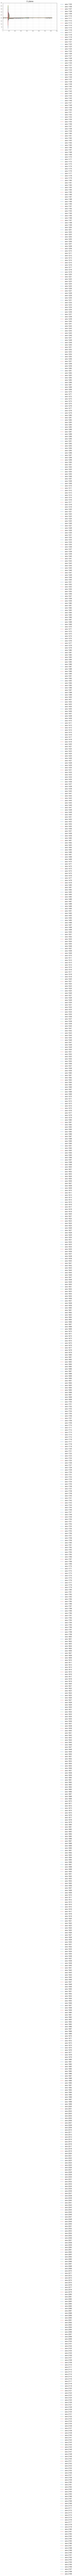

In [26]:
event=9
t_min , t_max = 0 , 8200
title = 'event %d wave-forms'%event
title = 'U plane'
fig,ax=plt.subplots(figsize=(12,6))
for wire in np.arange(1105,2200,1):
    h = histograms_file.Get("h_wf_evnt%d_wire%d"%(event , wire))
    histo=hist2array(h)
    plt.plot(np.arange(t_min , t_max,1), histo[t_min:t_max],label='wire %d'%wire)
# set_axes(ax,x_label='time tick',y_label='ADC',fontsize=20)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
ax.grid('--',alpha=0.75)
ax.set_title(title,y=1.02,fontsize=25)

7


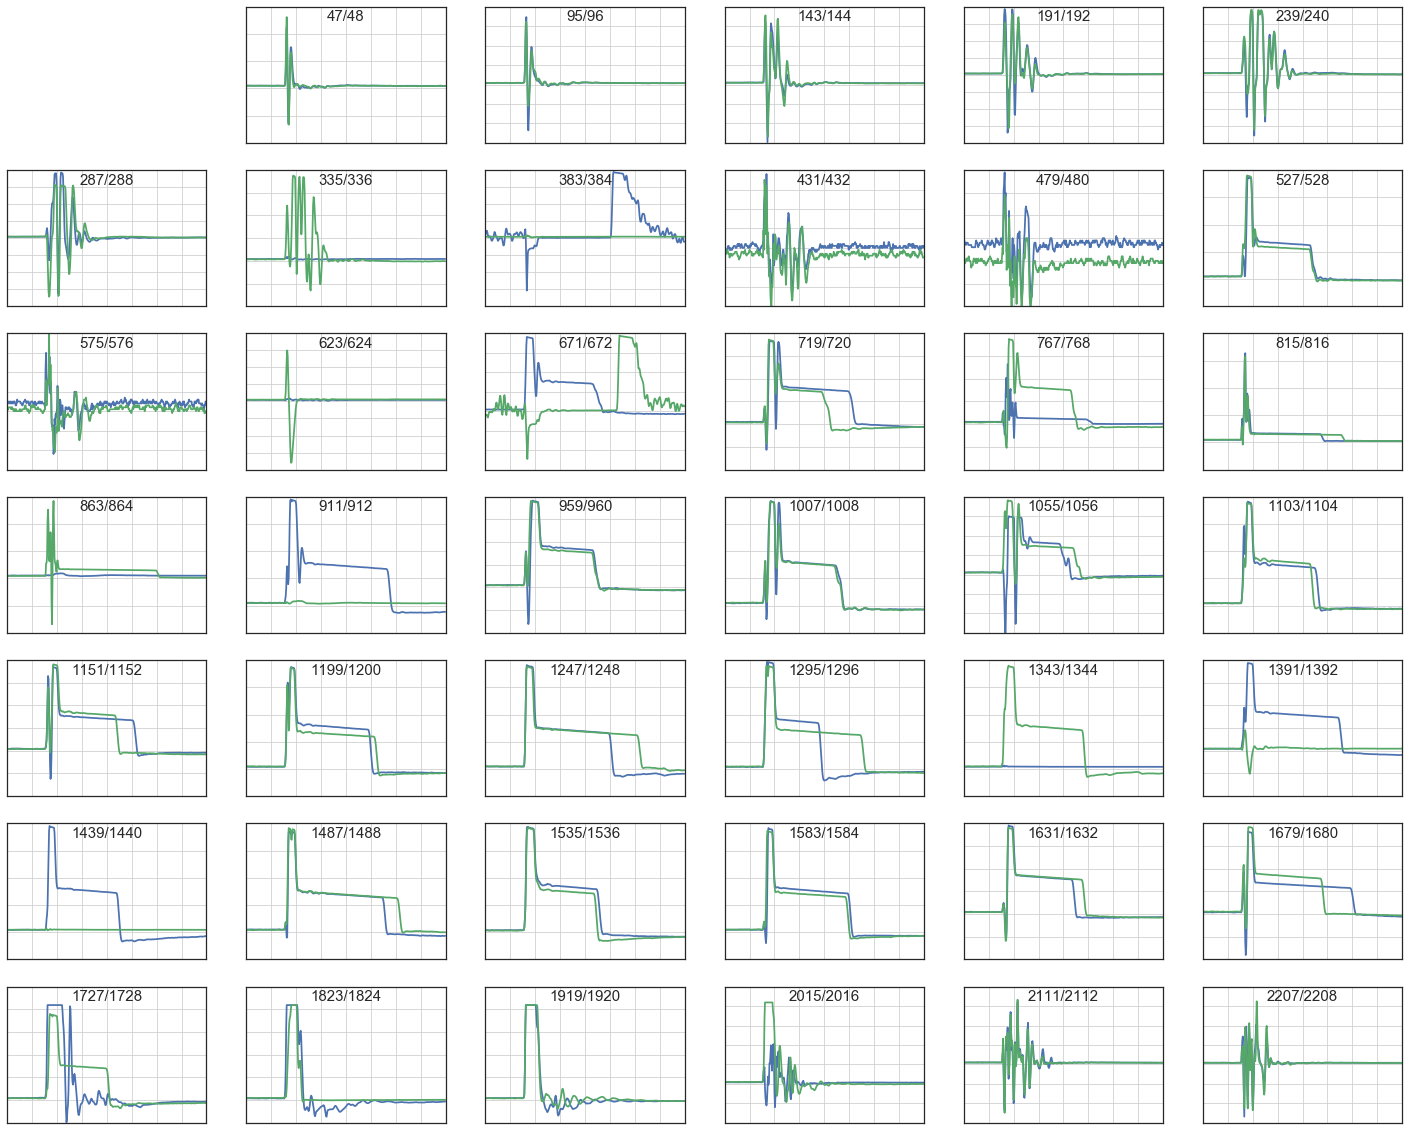

In [21]:
event , t_min , t_max = 8 , 4700 , 5100 # event 8 plane U
# event , t_min , t_max = 9 , 600 , 1200 # event 9 plane U

fig = plt.figure(figsize=(25,20))
title = 'around the mother-boards'
mb_set , mb_set_last = U_mb , U_mb_last
N = int(np.sqrt(len(mb_set)))+1
print N
for i in range(1,np.min([len(mb_set)-1,N*N])):
    wire , wire_last = mb_set[i] , mb_set_last[i-1]
    ax=fig.add_subplot(7,6,i+1)
    h_first=hist2array(histograms_file.Get("h_wf_evnt%d_wire%d"%(event , wire)))
    plt.plot(np.arange(t_min , t_max,1), h_first[t_min:t_max])

    h_last =hist2array(histograms_file.Get("h_wf_evnt%d_wire%d"%(event , wire_last)))
    plt.plot(np.arange(t_min , t_max,1), h_last[t_min:t_max])


    ax.legend(loc='best',fontsize=20)
    ax.set_title('%d/%d'%(wire_last,wire),y=0.86,fontsize=15)
    ax.grid('--',alpha=0.75)
    ax.xaxis.set_major_formatter( NullFormatter() )
    ax.yaxis.set_major_formatter( NullFormatter() )


# burst runs with 0kV

In [2]:
histograms_file = ROOT.TFile('/Users/erezcohen/Desktop/uBoone/analysis/BurstNoiseCheckEvents/runs_0kV.root')

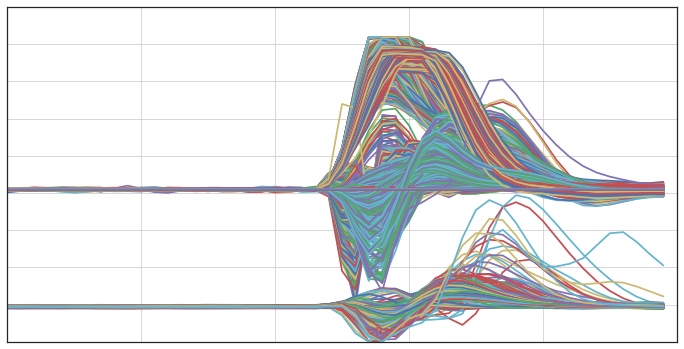

In [32]:
run , subrun , event = 9888 , 106 , 5329
wire , t_min , t_max = 1 , 3750 , 3800
title = 'r-%d/s-%d/e-%d wave-forms'%(run , subrun , event)
# title = 'U plane'
fig,ax=plt.subplots(figsize=(12,6))
for wire in np.arange(0,2400,1):
    h=hist2array(histograms_file.Get("h_wf_r%d_s%d_e%d_wire%d"%(run , subrun , event , wire)))
    plt.plot(np.arange(t_min , t_max,1), h[t_min:t_max],label='wire %d'%wire)
# set_axes(ax,x_label='time tick',y_label='ADC',fontsize=20)
# ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=15,ncol=2)
ax.xaxis.set_major_formatter( NullFormatter() )
ax.yaxis.set_major_formatter( NullFormatter() )
ax.grid('--',alpha=0.75)
# ax.set_title(title,y=1.02,fontsize=25)

In [29]:
def plot_wf_near_motherboards(mb_set=U_mb , mb_set_last=U_mb_last, 
                              run=9888, subrun=106 , event=5329 ,
                              t_min=3600 , t_max=4100):

    fig = plt.figure(figsize=(25,20))
    N = int(np.sqrt(len(mb_set)))+1

    for i in range(1,len(mb_set)-1):
        wire , wire_last = mb_set[i] , mb_set_last[i-1]
        ax=fig.add_subplot(len(mb_set)/6,6,i+1)

        h_last=hist2array(histograms_file.Get("h_wf_r%d_s%d_e%d_wire%d"%(run , subrun , event , wire_last)))
        plt.plot(np.arange(t_min , t_max,1), h_last[t_min:t_max] , color='blue')

        h_first=hist2array(histograms_file.Get("h_wf_r%d_s%d_e%d_wire%d"%(run , subrun , event , wire)))
        plt.plot(np.arange(t_min , t_max,1), h_first[t_min:t_max] , color='green')


        ax.legend(loc='best',fontsize=20)
        y_min,y_max=ax.get_ylim()
        plt.text(t_min+0.45*(t_max-t_min), y_min+0.9*(y_max-y_min), "%d"%wire_last, fontsize=15, color='blue', ha ='right')
        plt.text(t_min+0.5*(t_max-t_min), y_min+0.9*(y_max-y_min), "/", fontsize=15, color='black', ha ='center')
        plt.text(t_min+0.55*(t_max-t_min), y_min+0.9*(y_max-y_min), "%d"%wire, fontsize=15, color='green', ha ='left')

        ax.grid('--',alpha=0.75)
        ax.xaxis.set_major_formatter( NullFormatter() )
        ax.yaxis.set_major_formatter( NullFormatter() )



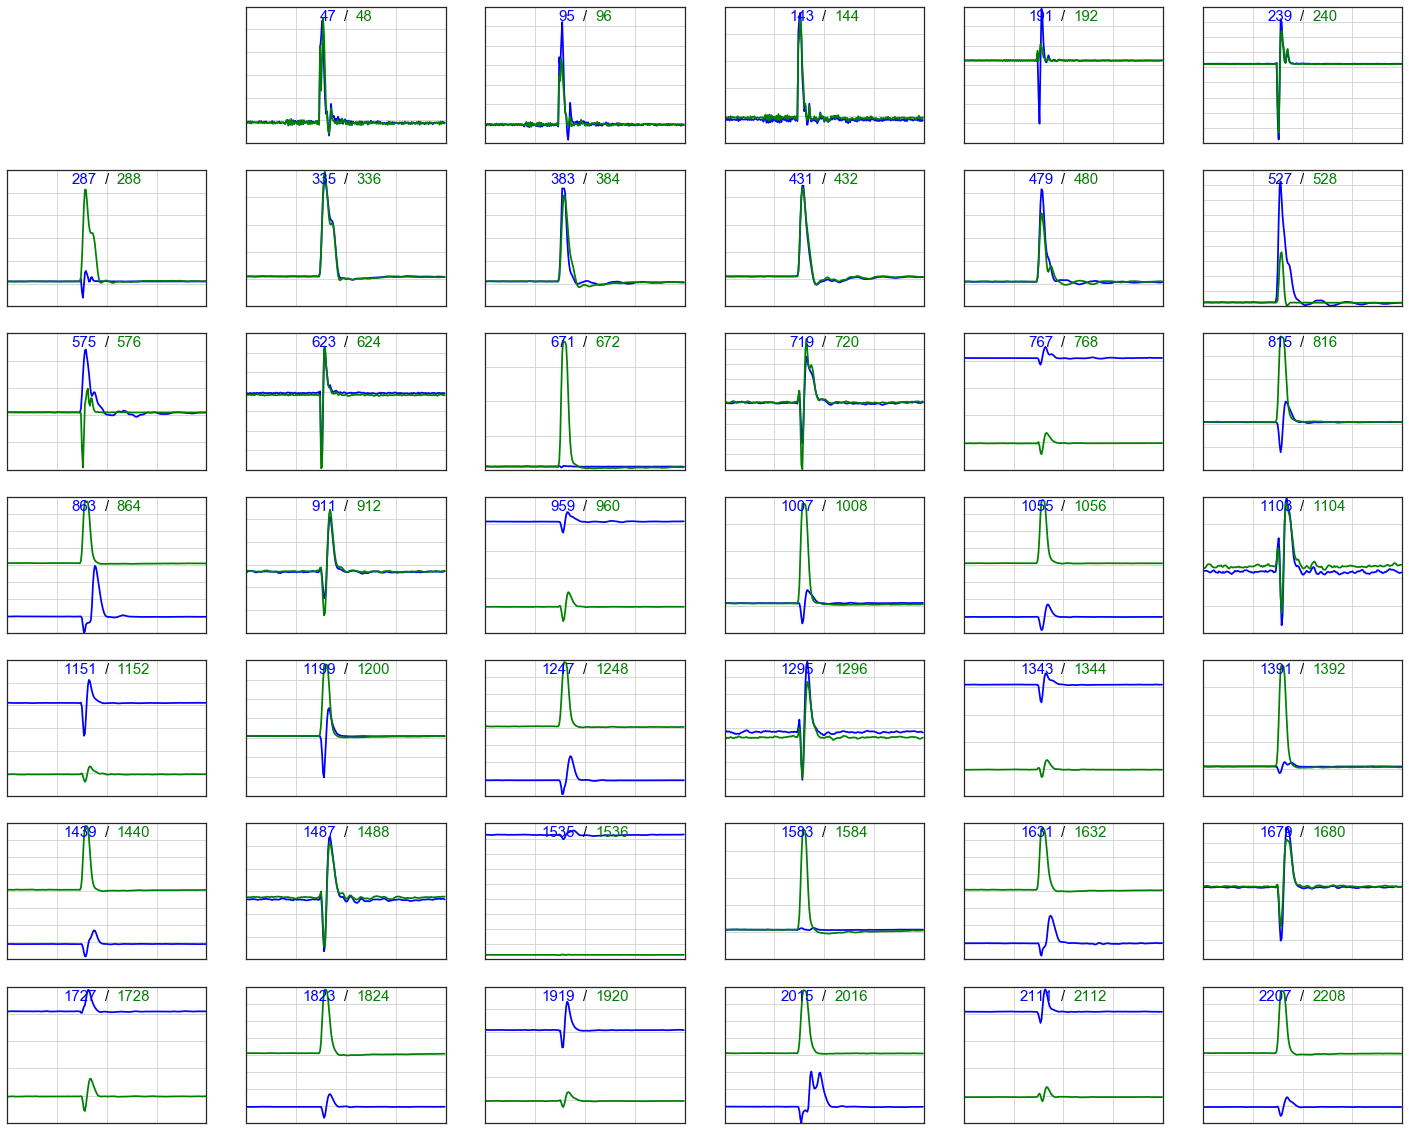

In [30]:
plot_wf_near_motherboards(mb_set=U_mb , mb_set_last=U_mb_last, 
                              run=9888, subrun=106 , event=5329 ,
                              t_min=3700 , t_max=3900)

In [ ]:
plot_wf_near_motherboards(mb_set=U_mb , mb_set_last=U_mb_last, 
                              run=9888, subrun=106 , event=5329 ,
                              t_min=1 , t_max=9000)

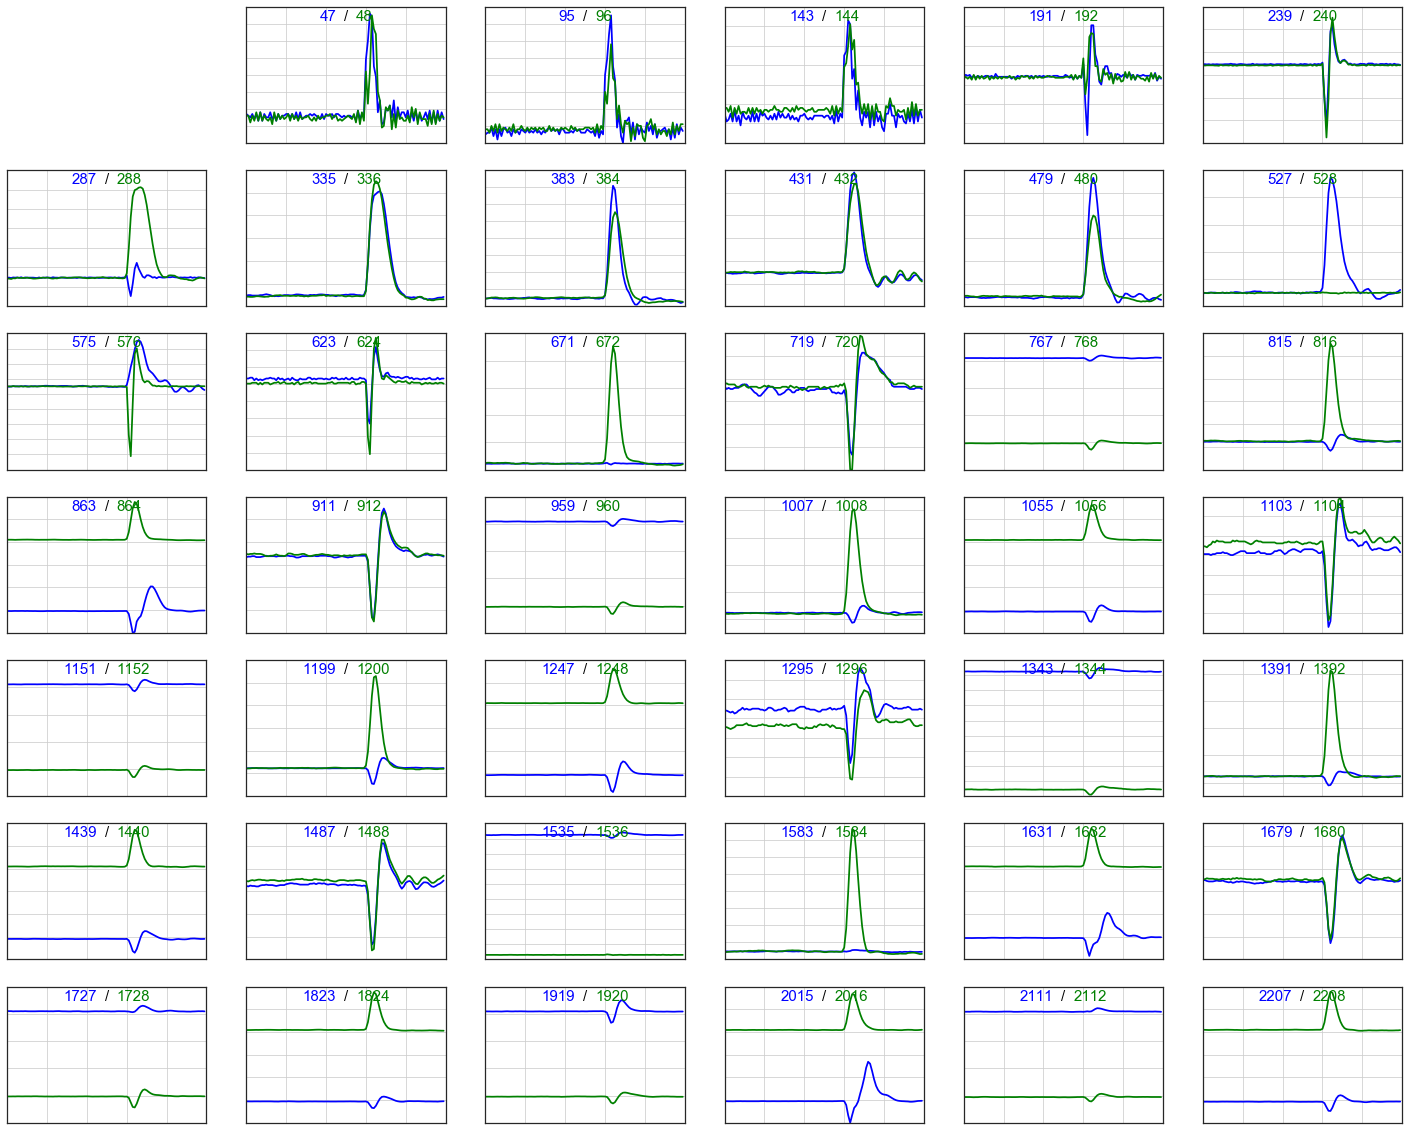

In [36]:
plot_wf_near_motherboards(mb_set=U_mb , mb_set_last=U_mb_last, 
                              run=9888, subrun=31 , event=1588 ,
                              t_min=6300 , t_max=6400)

ValueError: num must be 1 <= num <= 78, not 79

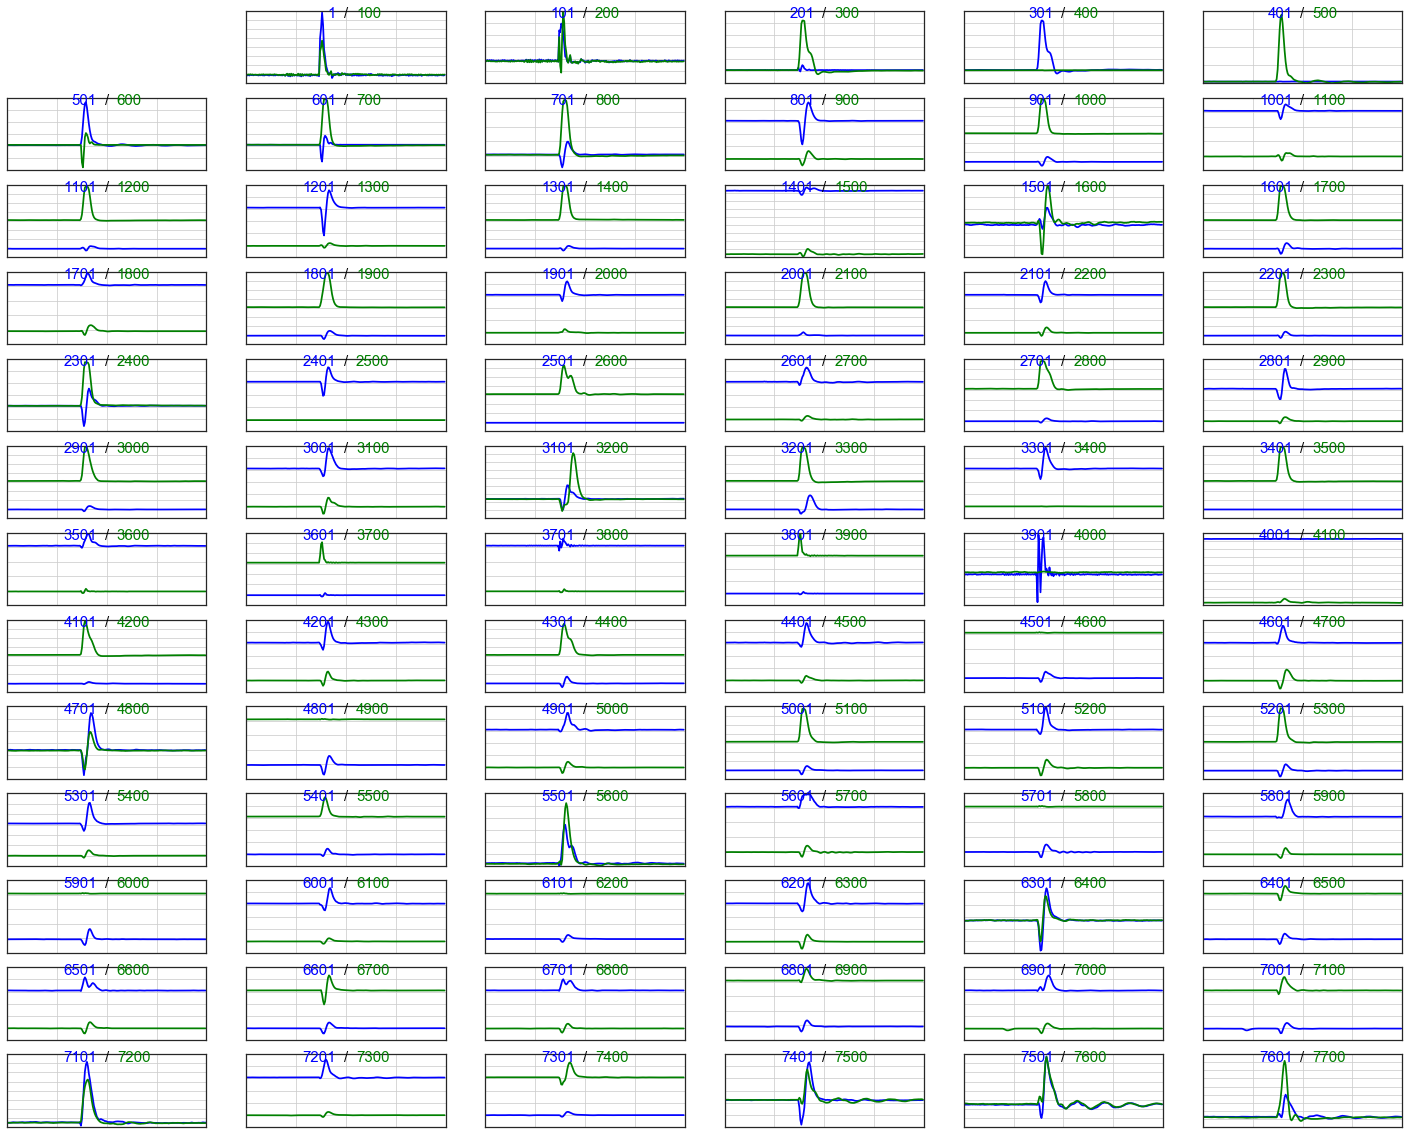

In [31]:
all_mb = np.arange(0,8256,100)
all_mb_last = np.arange(1,8256+1,100)
plot_wf_near_motherboards(mb_set=all_mb , mb_set_last=all_mb_last, 
                              run=9888, subrun=106 , event=5329 ,
                              t_min=3700 , t_max=3900)